In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import cv2
import os
import pandas as pd
import requests
import imghdr

In [4]:
actors_dir = "C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset"

In [5]:
 img_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [6]:
os.listdir("C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset")

['Anthony Hopkins',
 'Christoph Waltz',
 'Jim Carrey',
 'Joaquin Phoenix',
 'Keanu Reeves',
 'LeonardoDiCaprio',
 'Mike Myers',
 'Natalie Portman',
 'Tom Hanks']

In [7]:
img=cv2.imread(os.path.join('ActorsDataset', 'Jim Carrey', 'GettyImages-1203015316.jpg'))

In [8]:
type(img)


numpy.ndarray

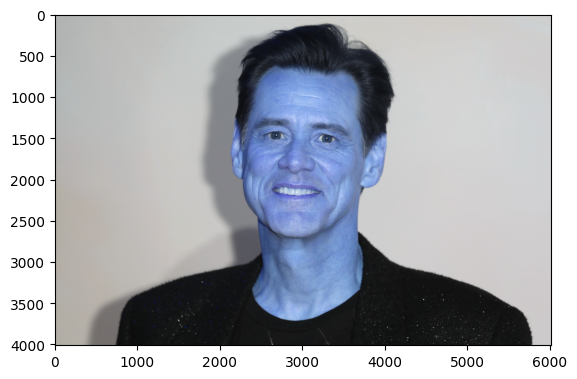

In [9]:
plt.imshow(img)

In [10]:
for image_class in os.listdir(actors_dir): 
    for image in os.listdir(os.path.join(actors_dir, image_class)):
        image_path = os.path.join(actors_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\0608_HULK_MAIN.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\0_81st-Annual-Academy-Awards-Arrivals.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\0_hopkinsJPG.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\1005_Loewe_Anthony-Hopkins_bag_HP2.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\1140-anthony-hopkins.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\1200px-Anthony_Hopkins-Tuscan_Sun_Festival.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\1200x628.2722513089005-224964415993.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDat

In [12]:
data = tf.keras.utils.image_dataset_from_directory("C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset")

Found 741 files belonging to 9 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [18]:
batch[1]

array([4, 5, 2, 3, 7, 5, 7, 4, 8, 0, 0, 3, 6, 6, 0, 8, 1, 1, 6, 8, 5, 2,
       1, 4, 6, 0, 5, 6, 5, 7, 1, 4])

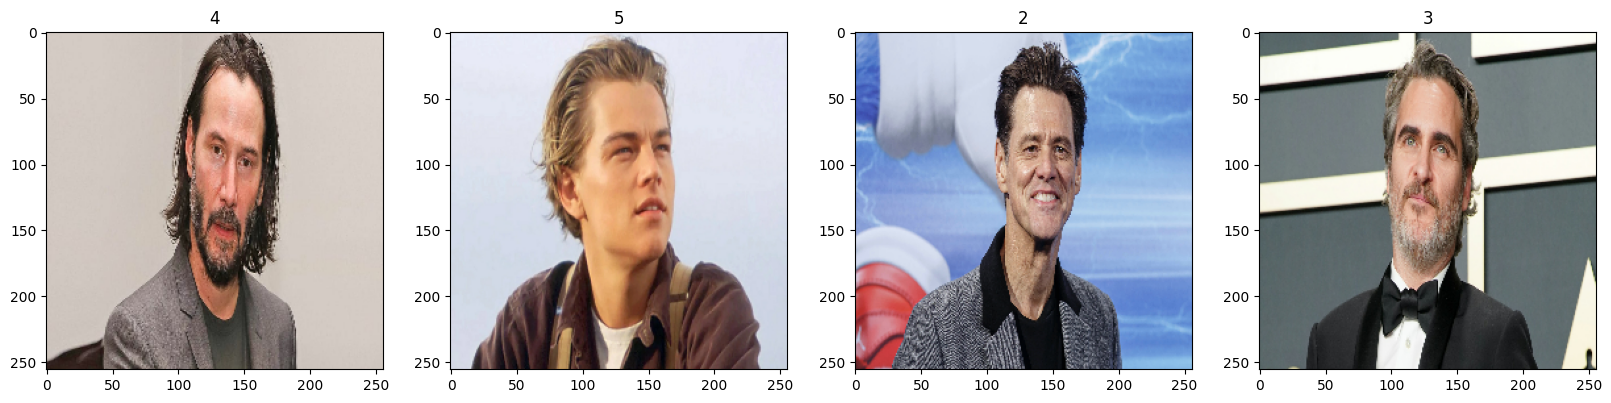

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
cnn.fit(X_train, y_train, epochs=25)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'PIL.JpegImagePlugin.JpegImageFile'>"}), (<class 'list'> containing values of types {"<class 'int'>"})